<a href="https://colab.research.google.com/github/alishazin/Credit-Card-Fraud-Detection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Fraud Detection using Python**

**Objective**

To analyze the customer's usual spending behavior, including mapping the location of those spendings to identify the fraudulent transactions from the non-fraudulent ones.

**Data Source**

https://www.kaggle.com/code/renjithmadhavan/credit-card-fraud-detection-using-python/input

**Import Library**

In [11]:
!pip install -U scikit-learn

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score
sns.set()
%matplotlib inline

**Import Data**

In [3]:
df = pd.read_csv('./creditcard.csv')
print(df.shape)
df.head()

(37722, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**Describe Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37722 entries, 0 to 37721
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    37722 non-null  int64  
 1   V1      37722 non-null  float64
 2   V2      37722 non-null  float64
 3   V3      37722 non-null  float64
 4   V4      37722 non-null  float64
 5   V5      37722 non-null  float64
 6   V6      37722 non-null  float64
 7   V7      37721 non-null  float64
 8   V8      37721 non-null  float64
 9   V9      37721 non-null  float64
 10  V10     37721 non-null  float64
 11  V11     37721 non-null  float64
 12  V12     37721 non-null  float64
 13  V13     37721 non-null  float64
 14  V14     37721 non-null  float64
 15  V15     37721 non-null  float64
 16  V16     37721 non-null  float64
 17  V17     37721 non-null  float64
 18  V18     37721 non-null  float64
 19  V19     37721 non-null  float64
 20  V20     37721 non-null  float64
 21  V21     37721 non-null  float64
 22

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,37722.000000,37722.000000,37722.000000,37722.000000,37722.000000,37722.000000,37722.000000,37721.000000,37721.000000,37721.000000,...,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000,37721.000000
mean,24766.905519,-0.207438,0.060003,0.717371,0.192425,-0.223913,0.099322,-0.113878,0.036184,0.234569,...,-0.030242,-0.112267,-0.041283,0.006498,0.136187,0.021816,0.009257,0.003928,86.029572,0.002731
std,12527.587139,1.826290,1.542122,1.518753,1.404199,1.379541,1.306858,1.250118,1.229029,1.230965,...,0.760639,0.639297,0.550248,0.593787,0.435848,0.505541,0.386284,0.299030,232.994577,0.052184
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,13890.000000,-0.962070,-0.514064,0.239253,-0.715389,-0.827569,-0.639691,-0.595964,-0.154250,-0.543033,...,-0.238364,-0.535135,-0.178672,-0.327777,-0.127541,-0.331097,-0.063228,-0.007002,7.190000,0.000000
50%,29826.000000,-0.231670,0.107303,0.822135,0.188408,-0.262141,-0.159274,-0.073638,0.045764,0.108784,...,-0.079107,-0.085964,-0.052248,0.061264,0.176033,-0.064077,0.008660,0.021275,22.820000,0.000000
75%,34937.750000,1.161603,0.748540,1.451850,1.073459,0.300384,0.486727,0.434617,0.310800,0.960733,...,0.098007,0.298240,0.076458,0.398894,0.421271,0.301099,0.085603,0.075752,77.750000,0.000000
max,39077.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


In [6]:
# How many are fraud and how many are not fraud ?
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Class
Not Fraud    37618
Fraud          103
Name: count, dtype: int64


**Data Visualization**

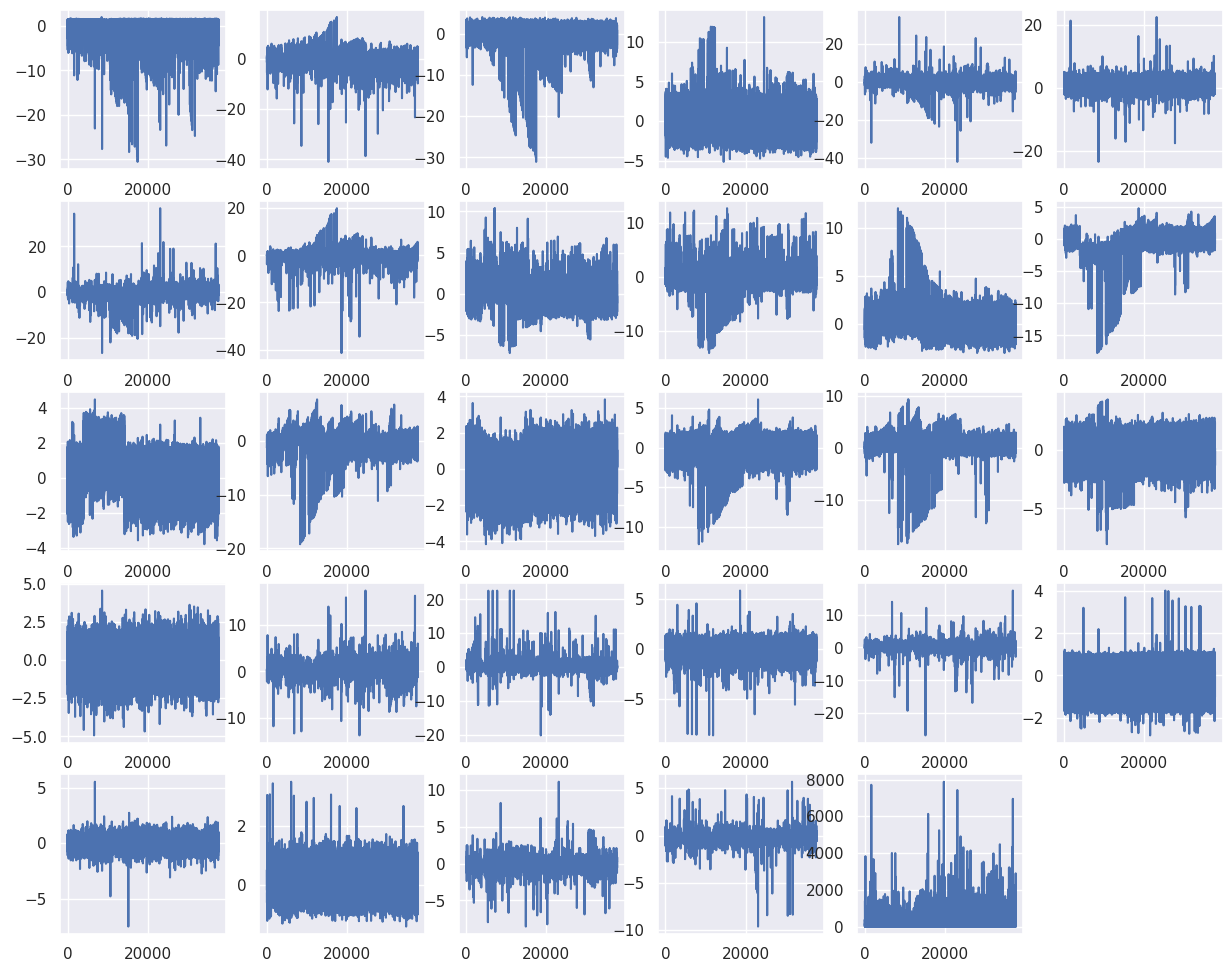

In [7]:
# Plotting all the variables using subplots
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df.V15)
plt.subplot(5, 6, 2) ; plt.plot(df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df.V16)
plt.subplot(5, 6, 3) ; plt.plot(df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df.V17)
plt.subplot(5, 6, 4) ; plt.plot(df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df.V18)
plt.subplot(5, 6, 5) ; plt.plot(df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df.V19)
plt.subplot(5, 6, 6) ; plt.plot(df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df.V20)
plt.subplot(5, 6, 7) ; plt.plot(df.V7) ; plt.subplot(5, 6, 21) ; plt.plot(df.V21)
plt.subplot(5, 6, 8) ; plt.plot(df.V8) ; plt.subplot(5, 6, 22) ; plt.plot(df.V22)
plt.subplot(5, 6, 9) ; plt.plot(df.V9) ; plt.subplot(5, 6, 23) ; plt.plot(df.V23)
plt.subplot(5, 6, 10) ; plt.plot(df.V10) ; plt.subplot(5, 6, 24) ; plt.plot(df.V24)
plt.subplot(5, 6, 11) ; plt.plot(df.V11) ; plt.subplot(5, 6, 25) ; plt.plot(df.V25)
plt.subplot(5, 6, 12) ; plt.plot(df.V12) ; plt.subplot(5, 6, 26) ; plt.plot(df.V26)
plt.subplot(5, 6, 13) ; plt.plot(df.V13) ; plt.subplot(5, 6, 27) ; plt.plot(df.V27)
plt.subplot(5, 6, 14) ; plt.plot(df.V14) ; plt.subplot(5, 6, 28) ; plt.plot(df.V28)
plt.subplot(5, 6, 29) ; plt.plot(df.Amount)
plt.show()

**Data Preprocessing**

In [28]:
# Dropping all the rows consisting of NaN value
df.dropna(inplace=True)

**Define Target Variable (y) and Feature Variables (X)**

In [29]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [30]:
data_features = df[feature_names]
data_target = df[target]

**Train Test Split**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 26405
Length of X_test is: 11317
Length of y_train is: 26405
Length of y_test is: 11317


**Modeling**

In [34]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

**Model Evaluation**

In [35]:
pred = model.predict(X_test)

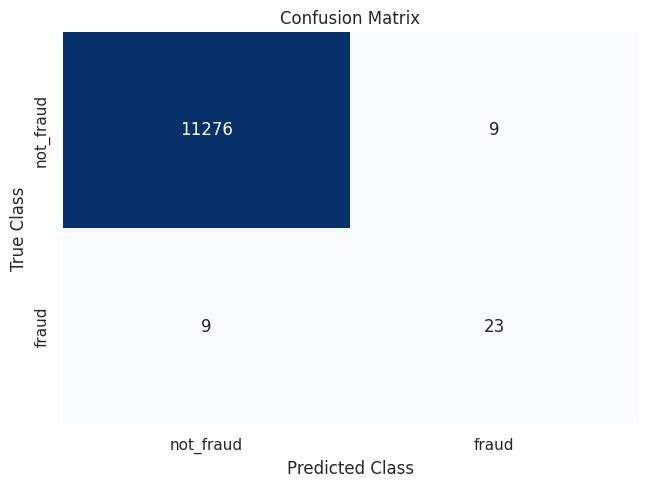

In [36]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

For a financial institution dealing with identifying fraud, Sensitivity and F1 - Score might be more important metrics. F1- Score reprsents a more balanced result as it is the harmonic mean between Precision and Recall. Sensitivity is more important in the sense that we are more interested in identifying fraud than than identifying legitimate customers. ( Assumption )

In [39]:
f1_score = round(f1_score(y_test, pred), 2)
recall_score = round(recall_score(y_test, pred), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model 1 : 0.72
F1 Score for Logistic Regression Model 1 : 0.72


**Prediction**

In [50]:
data =  df[feature_names].iloc[[2]]

pred = model.predict(data)
print(pred)
if pred == 0: print("not fraud")
else: print("fraud")

[0.]
not fraud


**Explanation**

A fraud transaction detection model using logistic regression identifies potential fraud by analyzing transaction patterns.. Each transaction is labeled as fraudulent or non-fraudulent based on historical data. Logistic regression is then applied as it's well-suited for binary classification, producing a probability score that reflects the likelihood of fraud. During training, the model adjusts its coefficients to minimize prediction errors. For each transaction, the model computes a fraud probability, and those above a chosen threshold (e.g., 0.5) are flagged as potentially fraudulent. The model's performance is evaluated using metrics like accuracy, precision, and recall, with a strong focus on recall to ensure fraudulent activities are effectively identified. This approach helps organizations proactively detect and mitigate fraud in real time.






